In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset.head(10)
#data.shape

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
data= dataset.iloc[:,[3,4]]
#X1 = data[:,0]
#X2 = data[:,1]
data


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
X= data.values

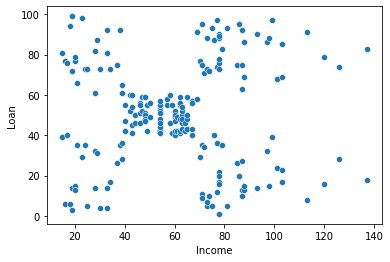

In [6]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

In [7]:
def calculate_cost(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
    return sum

In [8]:
def kmeans(X, k):
    diff = 1
    cluster = np.zeros(X.shape[0])
    centroids = data.sample(n=k).values
    while diff:
        for i, row in enumerate(X):
            
            mn_dist = float('inf')
        # dist of the point from all centroids
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
            # store closest centroid
                if mn_dist > d:
                    
                    mn_dist = d
                    cluster[i] = idx
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
     # if centroids are same then leave
        if np.count_nonzero(centroids-new_centroids) == 0:
            
            diff = 0
        else:
            
            centroids = new_centroids
    return centroids, cluster

In [9]:
cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)     

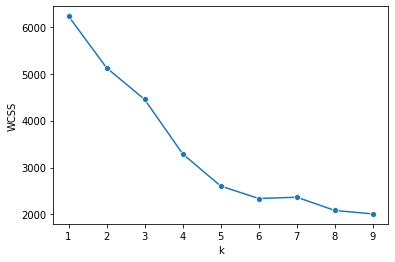

In [10]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [17]:
k = 5
centroids, cluster = kmeans(X, k)

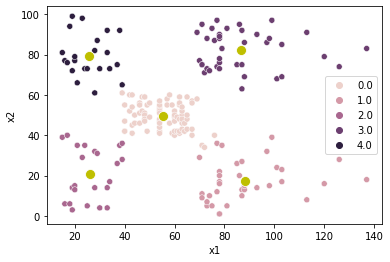

In [18]:
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()